## Part 2

In [1]:
#!pip install -U scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB,  ComplementNB

In [2]:
# Load the dataset and Splitting the features X and label L
def load_dataset():
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
  dataset = pd.read_csv(url, header=None)

# Specify column names
  column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
                'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',
                'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
                'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',
                'word_freq_font', 'word_freq000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
                'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
                'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
                'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
                'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
                'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
                'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
                'capital_run_length_total', 'Target']

  # Assign column names to the DataFrame
  dataset.columns = column_names

  # Split the Train dataset into features and labels
  X= dataset.iloc[:,:-1]
  Y= dataset.iloc[:,-1]

  return X ,Y, dataset

In [3]:
#Splitting Dataset Manual into training 80% and testing sets 20%
def split_dataset_Manual():

  X,Y,dataset= load_dataset()
  #dataset= dataset.sample(frac=1,random_state=42)

  Split_index = round(0.8 * len(dataset))

  X_Train = X[:Split_index]
  X_Test =  X[Split_index:]

  Y_Train = Y[:Split_index]
  Y_Test = Y[Split_index:]

  return X_Train,Y_Train,X_Test,Y_Test

In [4]:
#create Classification Report and heat map
def Accuracy_Report(clf_name, Y_Test, Y_Pred):

  clf_conf = confusion_matrix(Y_Test, Y_Pred)
  clf_report = classification_report(Y_Test, Y_Pred)
  clf_accuracy = round(accuracy_score(Y_Test, Y_Pred)*100, ndigits = 2)
  #print(f"Confusion Matrix of {clf_name} is: \n\n{clf_conf }")
  print(f"\nClassification Report of {clf_name} is: \n\n{clf_report}")
  print(f"\nThe Accuracy of {clf_name} is {clf_accuracy} % \n\n")

  ax=sns.heatmap(clf_conf, annot=True, fmt='d', cmap='YlGnBu')

  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Labels')
  plt.title(f'Confusion Matrix for {clf_name} with accuracy={clf_accuracy}%')

  plt.show()

  print('--------------------------------------------------------------------------------------------------------------------------------------------')
  print('--------------------------------------------------------------------------------------------------------------------------------------------')


In [5]:
#Run the Data set on specific model
def NB_classifiers(X_Train,Y_Train,X_Test,Y_Test ,classifiers):
    Results = {}
    for clf_name, clf in classifiers.items():
      # obtain predictions
      clf.fit(X_Train ,Y_Train)
      y_pred = clf.predict(X_Test)
      test_accuracy = clf.score(X_Test, Y_Test)

      #Storing the test accuracy
      Results[clf_name] = test_accuracy*100

      #generate the report and darw the heatmap
      clf_confuision_matrix = Accuracy_Report(clf_name, Y_Test, y_pred)
    return Results

In [6]:
# Count the occurrences of 1 and 0
def count_occurrence_Y_Train_Y_Test(Y_Train,Y_Test):
    count_1_Train = Y_Train[Y_Train == 1].count()
    count_0_Train = Y_Train[Y_Train == 0].count()

    count_1_Test = Y_Test[Y_Test == 1].count()
    count_0_Test = Y_Test[Y_Test == 0].count()


    # Create subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot for training data
    axs[0].bar(['Spam 1', 'Not Spam 0'], [count_1_Train, count_0_Train],color=['red', 'green'])
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Count')
    axs[0].set_title('Occurrences of Spam and Not-Spam in Training Data')

    # Plot for test data
    axs[1].bar(['Spam 1', 'Not Spam 0'], [count_1_Test, count_0_Test],color=['red', 'green'] )
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Count')
    axs[1].set_title('Occurrences of Spam and Not-Spam in Testing Data')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()

In [7]:
def Split_TrainData_4Subset(X_Train,Y_Train,percentage):

      Subset=round((percentage/100)*len(X_Train))
      Subset_4=(Subset*4)+1

      X_Train_Subset_1 = X_Train[:Subset]#920
      X_Train_Subset_2 =  X_Train[Subset:Subset*2]
      X_Train_Subset_3 =  X_Train[Subset*2:Subset*3]
      X_Train_Subset_4 =  X_Train[Subset*3:Subset_4]

      #Y_Train=Y[:Split_index]
      Y_Train_Subset_1 = Y_Train[:Subset]
      Y_Train_Subset_2 =  Y_Train[Subset:Subset*2]
      Y_Train_Subset_3 =  Y_Train[Subset*2:Subset*3]
      Y_Train_Subset_4 =  Y_Train[Subset*3:Subset_4]

      return X_Train_Subset_1,X_Train_Subset_2,X_Train_Subset_3,X_Train_Subset_4,Y_Train_Subset_1,Y_Train_Subset_2,Y_Train_Subset_3,Y_Train_Subset_4

In [8]:
# Create a figure and axis
def Draw_barChart(categories,values):
    fig, ax = plt.subplots()

    # Create the bar chart
    ax.bar(categories, Result, color='steelblue', edgecolor='black')

    # Set the labels and title
    ax.set_xlabel('Categories')
    ax.set_ylabel('Values')
    ax.set_title('Bar Chart')

    # Set the style of the grid
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Customize the tick labels
    ax.tick_params(axis='x', rotation=45)

    # Display the chart
    plt.tight_layout()
    plt.show()



# (a)
Split the dataset into two parts as training data and test data. first 80 percent
samples should be selected as training data and last 20 percent samples should
be selected as test data.

In [9]:
X_Train,Y_Train,X_Test,Y_Test=split_dataset_Manual()

In [10]:
classifiers = {
            "Gaussian Naive Bayes": GaussianNB(),
            "Multinomial Naive Bayes": MultinomialNB()
}


Classification Report of Gaussian Naive Bayes is: 

              precision    recall  f1-score   support

           0       1.00      0.62      0.77       920
           1       0.00      0.00      0.00         0

    accuracy                           0.62       920
   macro avg       0.50      0.31      0.38       920
weighted avg       1.00      0.62      0.77       920


The Accuracy of Gaussian Naive Bayes is 61.96 % 




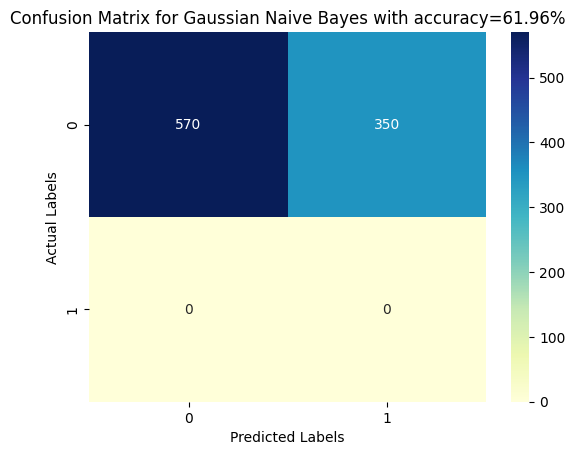

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------

Classification Report of Multinomial Naive Bayes is: 

              precision    recall  f1-score   support

           0       1.00      0.72      0.84       920
           1       0.00      0.00      0.00         0

    accuracy                           0.72       920
   macro avg       0.50      0.36      0.42       920
weighted avg       1.00      0.72      0.84       920


The Accuracy of Multinomial Naive Bayes is 72.39 % 




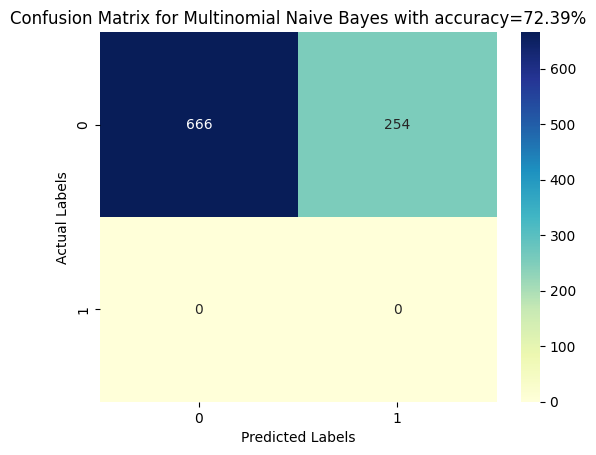

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------


In [11]:
M_Results=NB_classifiers(X_Train,Y_Train,X_Test,Y_Test,classifiers)

In [12]:
#Results
sorted_Acc1 = sorted(M_Results.items(), key = lambda x:x[1], reverse = True)
M_df = pd.DataFrame (sorted_Acc1, columns = ['Model','Accuracy Score'])
M_df.style.background_gradient(cmap='coolwarm')

,Model,Accuracy Score
0,Multinomial Naive Bayes,72.391304
1,Gaussian Naive Bayes,61.956522


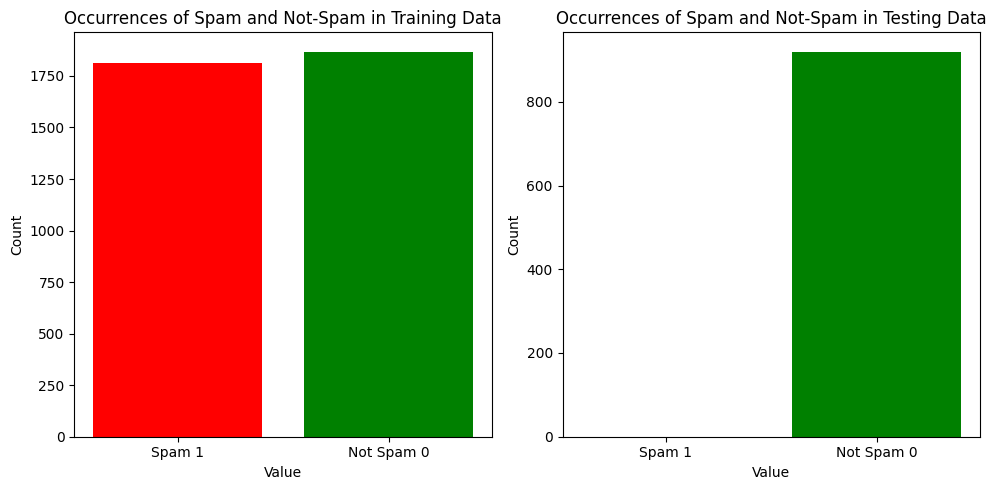

In [13]:
count_occurrence_Y_Train_Y_Test(Y_Train,Y_Test)


#(b)
Use train test split function on input and output of the whole data and utilize 80% of samples as train and 20% of samples as test data.

In [14]:
#Split dataset using train_test_split
X,Y,dataset= load_dataset()
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)



Classification Report of Gaussian Naive Bayes is: 

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921


The Accuracy of Gaussian Naive Bayes is 82.08 % 




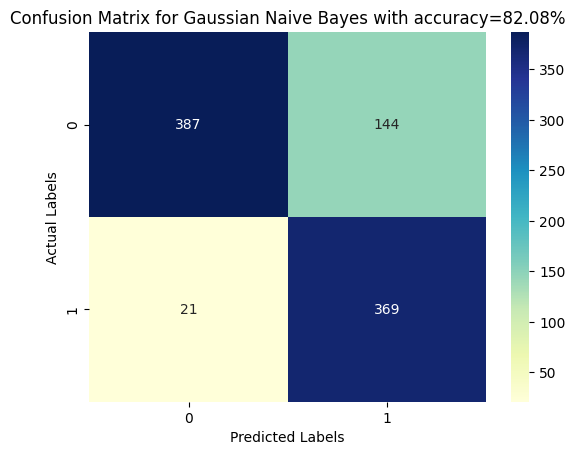

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------

Classification Report of Multinomial Naive Bayes is: 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       531
           1       0.76      0.72      0.74       390

    accuracy                           0.79       921
   macro avg       0.78      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921


The Accuracy of Multinomial Naive Bayes is 78.61 % 




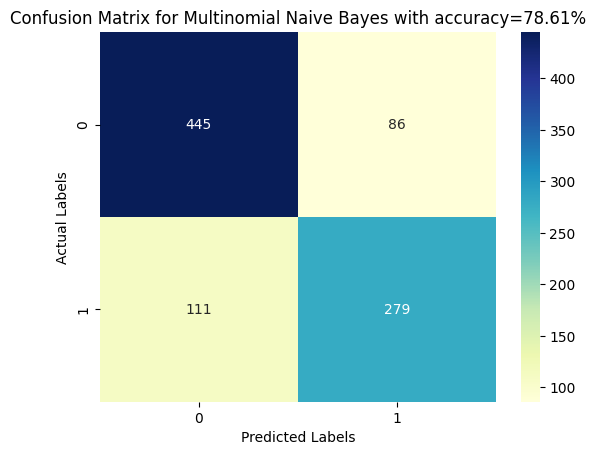

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------


In [15]:
A_Results=NB_classifiers(X_Train,Y_Train,X_Test, Y_Test,classifiers)

In [16]:
#Results
sorted_Acc1 = sorted(A_Results.items(), key = lambda x:x[1], reverse = True)
A_df = pd.DataFrame (sorted_Acc1, columns = ['Model','Accuracy Score' ])
A_df.style.background_gradient(cmap='coolwarm')

,Model,Accuracy Score
0,Gaussian Naive Bayes,82.084691
1,Multinomial Naive Bayes,78.610206


In [17]:
# Display the dataframes side by side
print("Models using Manual Spliting\n")
display(M_df.style.background_gradient(cmap='YlGnBu'))

print("---------------------------------------------------")
print("\nModels using train test split function")
display(A_df.style.background_gradient(cmap='YlGnBu'))


Models using Manual Spliting



,Model,Accuracy Score
0,Multinomial Naive Bayes,72.391304
1,Gaussian Naive Bayes,61.956522


---------------------------------------------------

Models using train test split function


,Model,Accuracy Score
0,Gaussian Naive Bayes,82.084691
1,Multinomial Naive Bayes,78.610206


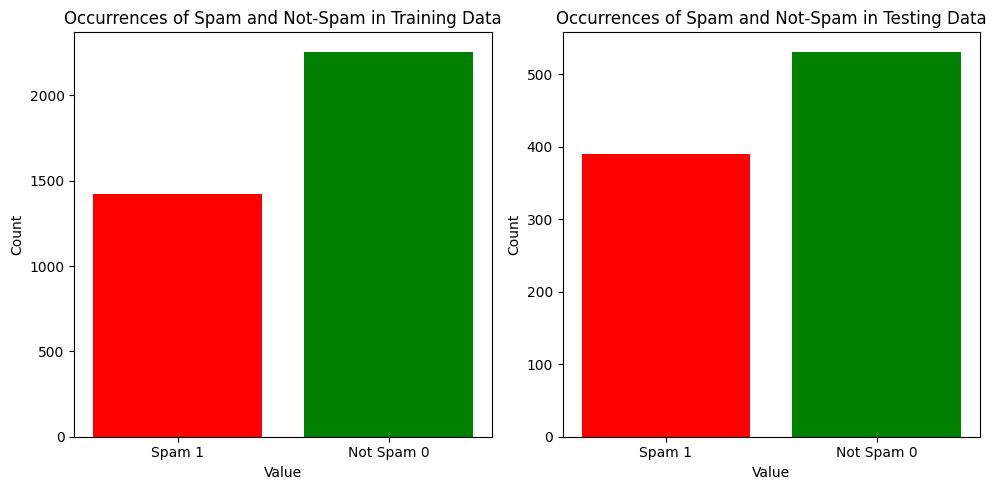

In [18]:
count_occurrence_Y_Train_Y_Test(Y_Train,Y_Test)

#(c)
Use another Naive Bayes classifier of your choice to check for the improvement in terms of accuarcy score of test data




Classification Report of Bernoulli Naive Bayes is: 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       531
           1       0.91      0.80      0.85       390

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.88       921
weighted avg       0.88      0.88      0.88       921


The Accuracy of Bernoulli Naive Bayes is 88.06 % 




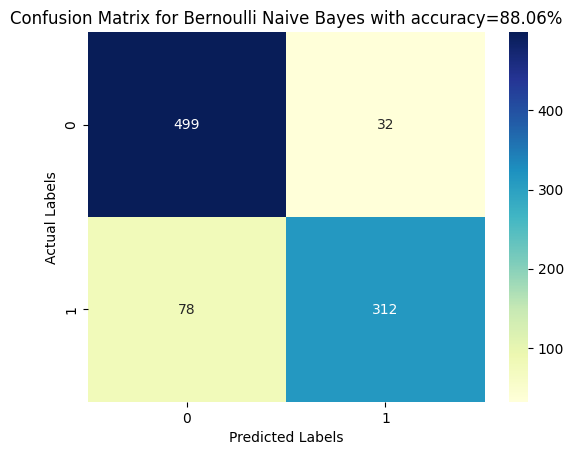

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------

Classification Report of Complement Naive Bayes is: 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       531
           1       0.77      0.74      0.75       390

    accuracy                           0.79       921
   macro avg       0.79      0.79      0.79       921
weighted avg       0.79      0.79      0.79       921


The Accuracy of Complement Naive Bayes is 79.26 % 




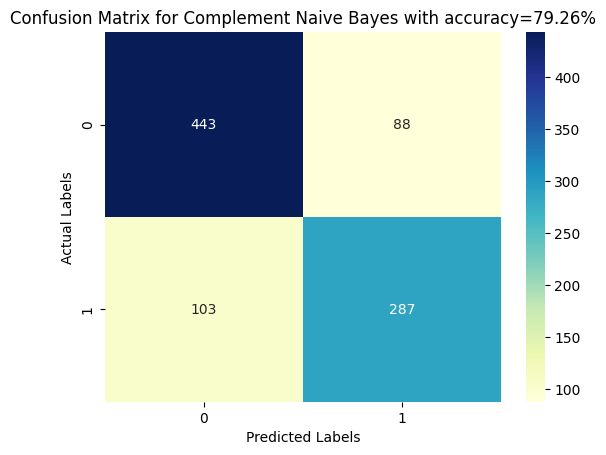

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------


In [19]:
classifiers = {
            "Bernoulli Naive Bayes": BernoulliNB(),
            "Complement Naive Bayes": ComplementNB()
    }
Total_Results=NB_classifiers(X_Train,Y_Train,X_Test,Y_Test, classifiers)

In [20]:
#Results
sorted_Acc = sorted(Total_Results.items(), key = lambda x:x[1], reverse = True)
df = pd.DataFrame (sorted_Acc , columns = ['Model','Accuracy Score'])
display(df.style.background_gradient(cmap='coolwarm'))
print('------------------------------------------------------------------')


,Model,Accuracy Score
0,Bernoulli Naive Bayes,88.056460
1,Complement Naive Bayes,79.261672


------------------------------------------------------------------


In [21]:
# Concatenating the dataframes horizontally
result = pd.concat([A_df, df], axis=0)

sorted_df = result.sort_values(by=['Accuracy Score'],ascending=False)

# Remove the counter (index)
sorted_df = sorted_df.reset_index(drop=True)
sorted_df.style.background_gradient(cmap='YlGnBu')



,Model,Accuracy Score
0,Bernoulli Naive Bayes,88.056460
1,Gaussian Naive Bayes,82.084691
2,Complement Naive Bayes,79.261672
3,Multinomial Naive Bayes,78.610206


# (D)

In [34]:
classifier= { "Bernoulli Naive Bayes": BernoulliNB()}

In [35]:
X_Train,Y_Train,X_Test,Y_Test=split_dataset_Manual()
X_Train_Subset_1,X_Train_Subset_2,X_Train_Subset_3,X_Train_Subset_4,Y_Train_Subset_1,Y_Train_Subset_2,Y_Train_Subset_3,Y_Train_Subset_4=Split_TrainData_4Subset(X_Train,Y_Train,25)


Classification Report of Bernoulli Naive Bayes is: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     920.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     920.0
   macro avg       0.00      0.00      0.00     920.0
weighted avg       0.00      0.00      0.00     920.0


The Accuracy of Bernoulli Naive Bayes is 0.0 % 




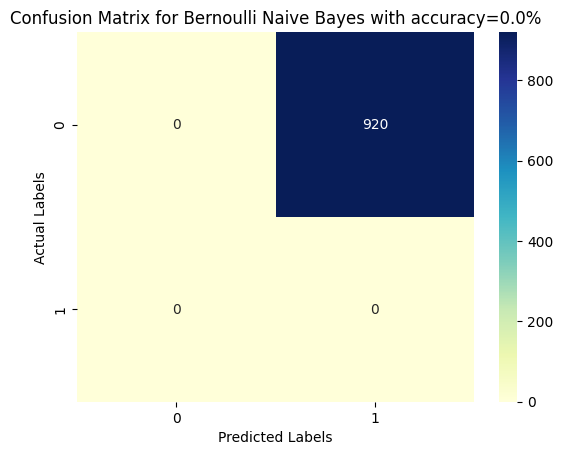

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------


In [36]:
Result=[]
Result.extend(NB_classifiers(X_Train_Subset_1,Y_Train_Subset_1,X_Test,Y_Test, classifier).values())

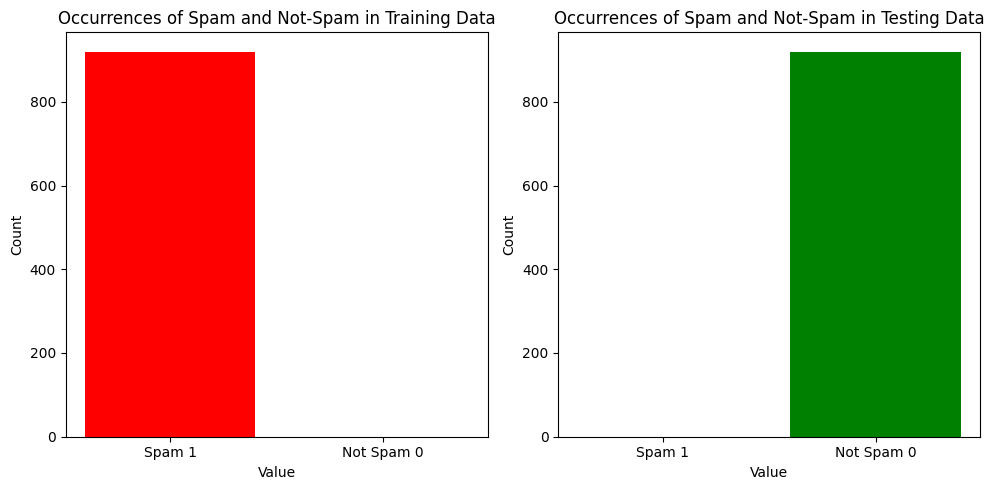

In [37]:
count_occurrence_Y_Train_Y_Test(Y_Train_Subset_1,Y_Test)


Classification Report of Bernoulli Naive Bayes is: 

              precision    recall  f1-score   support

           0       1.00      0.64      0.78       920
           1       0.00      0.00      0.00         0

    accuracy                           0.64       920
   macro avg       0.50      0.32      0.39       920
weighted avg       1.00      0.64      0.78       920


The Accuracy of Bernoulli Naive Bayes is 64.35 % 




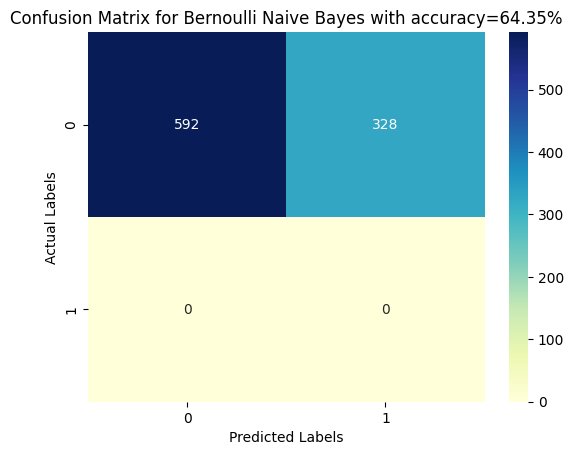

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------


In [38]:
Result.extend(NB_classifiers(X_Train_Subset_2,Y_Train_Subset_2,X_Test,Y_Test, classifier).values())

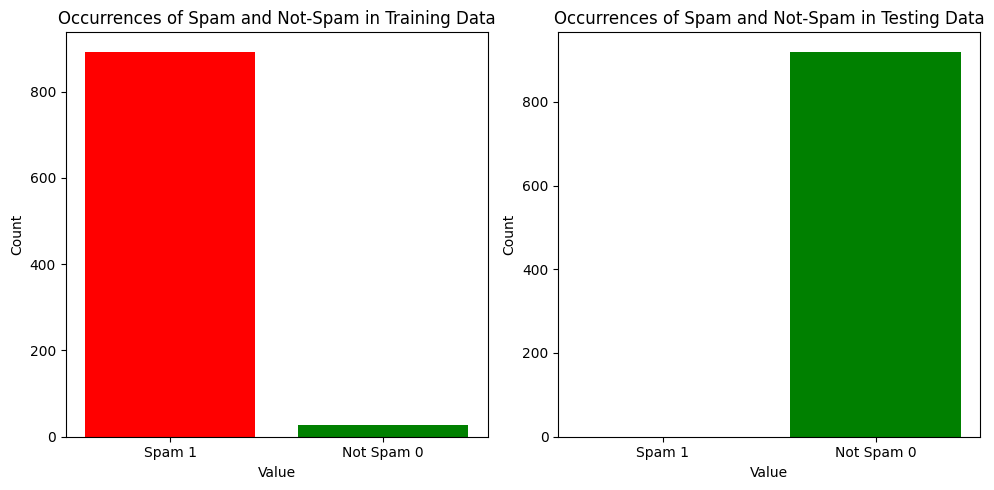

In [39]:
count_occurrence_Y_Train_Y_Test(Y_Train_Subset_2,Y_Test)


Classification Report of Bernoulli Naive Bayes is: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       920

    accuracy                           1.00       920
   macro avg       1.00      1.00      1.00       920
weighted avg       1.00      1.00      1.00       920


The Accuracy of Bernoulli Naive Bayes is 100.0 % 




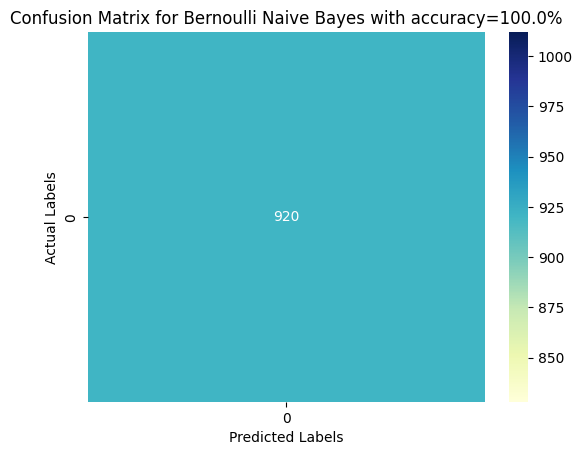

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------


In [40]:
Result.extend(NB_classifiers(X_Train_Subset_3,Y_Train_Subset_3,X_Test,Y_Test, classifier).values())

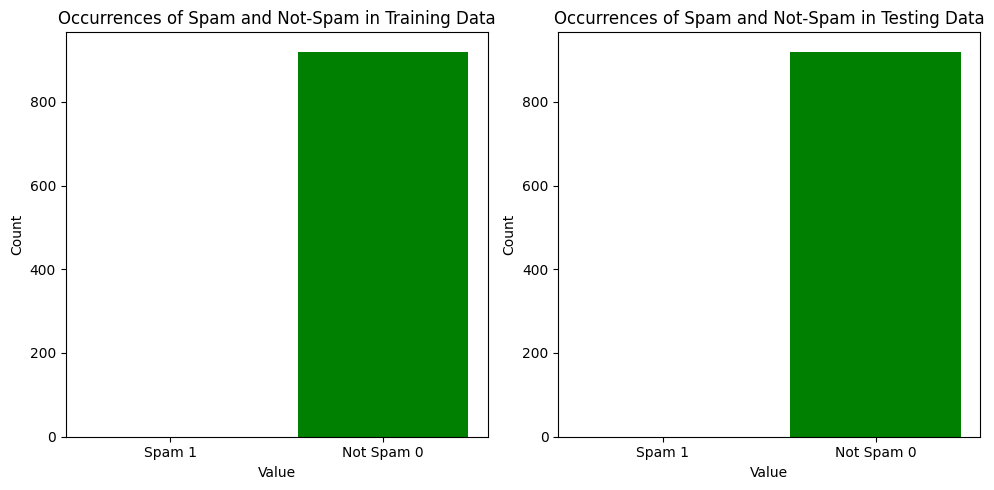

In [41]:
count_occurrence_Y_Train_Y_Test(Y_Train_Subset_3,Y_Test)


Classification Report of Bernoulli Naive Bayes is: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       920

    accuracy                           1.00       920
   macro avg       1.00      1.00      1.00       920
weighted avg       1.00      1.00      1.00       920


The Accuracy of Bernoulli Naive Bayes is 100.0 % 




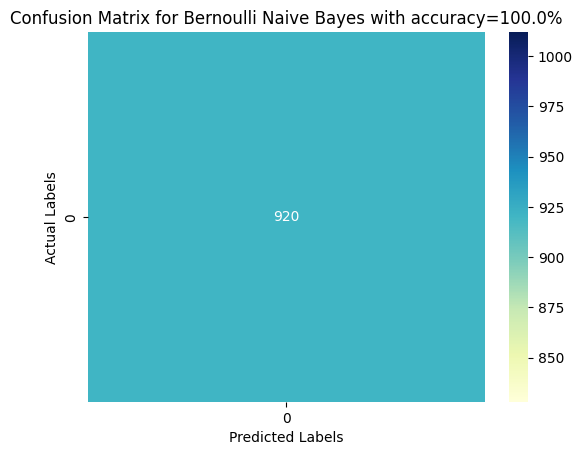

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------


In [42]:
Result.extend(NB_classifiers(X_Train_Subset_4,Y_Train_Subset_4,X_Test,Y_Test, classifier).values())

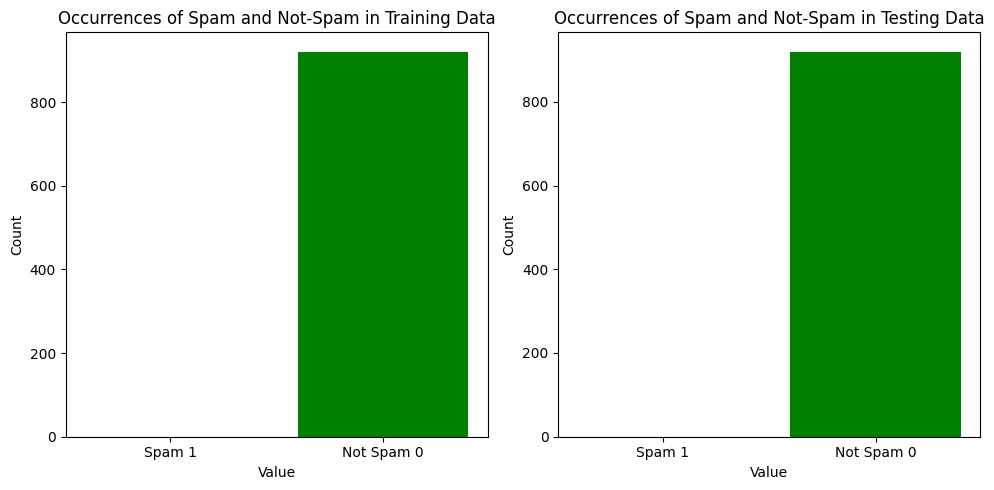

In [43]:
count_occurrence_Y_Train_Y_Test(Y_Train_Subset_4,Y_Test)

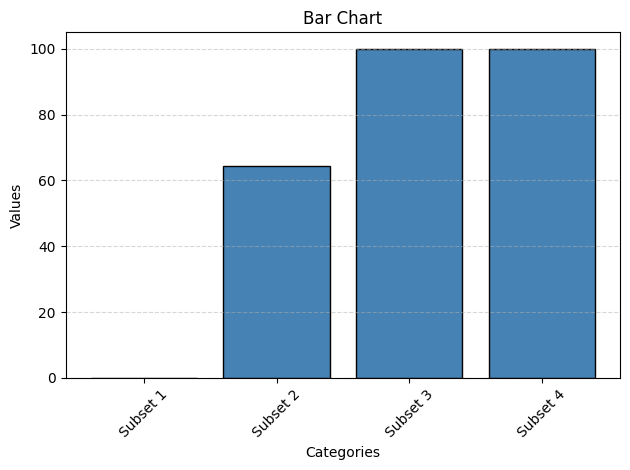

In [32]:

# Data for the bar chart
categories = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4']
#Draw BarChart to compare Accuracies
Draw_barChart(categories,Result)